# 2D Trajectory Estimation of Porabola

We will be using least squares fitting. More information on the method [here](http://en.wikipedia.org/wiki/Least_squares).

### Creating Animation

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [32]:
# Generate x data
x = np.linspace(-10, 10, 500)
y = x**2 # or any function you want to animate

#Generate (X,Y sample)
x_sample = np.random.choice(x, size=20, replace=False)
y_sample = x_sample**2


### Line Fitting 

In [33]:
## Least squares aproximation 
coef = np.polyfit(x_sample, y_sample, deg=2)

p = np.poly1d(coef)         # callable

# Generate smooth prediction for animation
x_fit = np.linspace(-10, 10, 500)
y_fit = p(x_fit)

### Animate line fitting 

Animation saved as line_animation.mp4


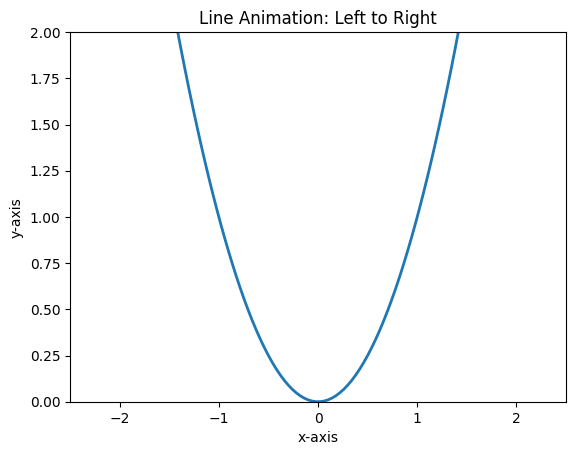

In [35]:

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(0, 2)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_title("Line Animation: Left to Right")

# Line object to update
(line,) = ax.plot([], [], lw=2)

# Initialize empty line
def init():
    line.set_data([], [])
    return (line,)

# Update function for each frame
def update(frame):
    end = int((frame / 120) * len(x))  # 120 frames total
    line.set_data(x_fit[:end], y_fit[:end])
    return (line,)

# Create animation
ani = FuncAnimation(
    fig,
    update,
    frames=120,       # only 120 frames
    init_func=init,
    interval=50,      # 20 fps (1000/50)
    blit=True
)


# Save as MP4 (optional)
ani.save("line_animation.mp4", writer="ffmpeg", fps=20)
print("Animation saved as line_animation.mp4")